## Encontrar top5 evaluadores

In [43]:
from joblib import load, dump 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import seaborn as sns
import numpy as np

### Topicos por evaluador

In [44]:
topicos_evaluador = load('../../trained_models/modelo_entregado/respaldo/archivos/topicos_por_evaluador_trained.pkl')
topicos_evaluador.reset_index(drop=False,inplace=True)
evaluadores_entreanado = topicos_evaluador["CVU"].tolist()
#  rcea_entreanado = topicos_evaluador["CVU"].tolist()
topicos_evaluador.head(5)

,CVU,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,2,1.130600,0.118392,0.294950,0.356411,0.389314,0.133646,0.459778,0.835775,0.256283,...,0.094112,0.036073,0.208901,0.143347,0.016533,0.359721,0.001283,0.288486,0.200580,0.030831
1,3,0.798631,0.259242,1.130029,0.221025,0.482941,0.174408,1.473934,0.746537,0.899780,...,0.111244,0.038424,0.025052,0.191529,0.011577,0.243613,0.002569,0.065418,0.090378,0.000888
2,4,1.025511,0.222316,0.216595,0.378107,0.328052,0.161120,0.539472,0.670366,0.158943,...,0.074608,0.092555,0.145443,0.017091,0.069689,0.106354,0.109976,0.143644,0.222613,0.149978
3,5,0.931354,0.262250,0.144247,0.162760,0.126175,0.133520,0.533761,0.644740,0.175555,...,0.146362,0.001076,0.071753,0.261185,0.006734,0.143575,0.031772,0.066532,0.000424,0.115548
4,7,0.935074,1.381798,0.355821,0.111049,0.703582,1.122429,0.885398,0.564632,0.366130,...,0.047770,0.304340,0.150376,0.111851,0.153792,0.396355,0.086703,0.136461,0.000465,0.263136


In [45]:
topicos_evaluador["CVU"].nunique()

8842

## Topicos por propuesta

In [46]:
topicos_texto = load("../../trained_models/modelo_entregado/respaldo/archivos/topicos_por_texto_trained.pkl")
topicos_texto.drop_duplicates("ID_PROYECTO", inplace=True)
id_proyecto_index = topicos_texto["ID_PROYECTO"].tolist()
topicos_texto.head(2)

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,ID_PROYECTO
0,0.599992,0.383979,0.437086,0.098177,0.090821,0.121714,0.478865,0.144643,0.235428,0.043327,...,6.818960e-08,0.043533,0.256114,6.382170e-08,2.195989e-09,1.738395e-08,8.195671e-07,0.000001,1.604645e-09,4647203
1,0.451738,2.867823,0.387988,0.168737,0.067228,0.469127,0.364380,0.401964,0.188020,0.118290,...,4.985725e-01,0.069736,0.399692,1.545346e-04,9.232526e-03,4.200308e-01,7.693902e-07,0.000732,3.132806e-05,2574574


In [47]:
topicos_texto.shape

(3232, 301)

### cosine similarity

obtener score en las colas t.

In [48]:
cos_simi = cosine_similarity(topicos_evaluador.iloc[:,1:], topicos_texto.iloc[:,:-1])

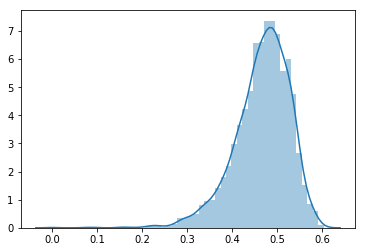

In [49]:
df_cos_simi = pd.DataFrame(cos_simi)
sns.distplot(df_cos_simi.mean(axis=0))

## encontrar top 5 evaluadores

In [50]:
numero_sugeridos = 20

encontramos elpercentil 97 por fila

In [51]:
df_evaluadores_recomendados = pd.DataFrame(index=[i for i in range(len(id_proyecto_index*numero_sugeridos))]
                                           ,columns=["id_proyecto","CVU","score_tm"])
df_evaluadores_recomendados.head()                                

,id_proyecto,CVU,score_tm
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [52]:
def normalize(lista, to_sum=False, copy=True):
    # d is a (n x dimension) np array
    lista_max = np.max(lista, axis=0)
    lista = [elemento/lista_max for elemento in lista ]
    return lista

In [53]:
cvu_evaluadores_lista = []
score_evaluadores_lista = []
id_proyecto_lista = []

for proyecto in range(df_cos_simi.shape[1]):
    
    list_each_proyecto = df_cos_simi.iloc[:,proyecto].tolist()
    
    top_5_idx = np.argsort(list_each_proyecto)[-numero_sugeridos:][::-1].tolist()
    
    [cvu_evaluadores_lista.append(evaluadores_entreanado[pos]) for pos in top_5_idx] 
    
    # normalized_score = normalize([df_cos_simi.iloc[pos,proyecto] for pos in top_5_idx])
    [score_evaluadores_lista.append(df_cos_simi.iloc[pos,proyecto]) for pos in top_5_idx]
    [id_proyecto_lista.append(id_proyecto_index[proyecto]) for i in range(numero_sugeridos)]


In [54]:
df_evaluadores_recomendados["id_proyecto"] = id_proyecto_lista
df_evaluadores_recomendados["CVU"] = cvu_evaluadores_lista
df_evaluadores_recomendados["score_tm"] = score_evaluadores_lista

In [55]:
df_evaluadores_recomendados.iloc[0:50,:]

,id_proyecto,CVU,score_tm
0,4647203,120981,0.668643
1,4647203,55008,0.664404
2,4647203,344873,0.661457
3,4647203,299283,0.645468
4,4647203,20027,0.641073
5,4647203,12426,0.634665
6,4647203,436019,0.634357
7,4647203,15326,0.633498
8,4647203,10087,0.633415
9,4647203,13010,0.632130


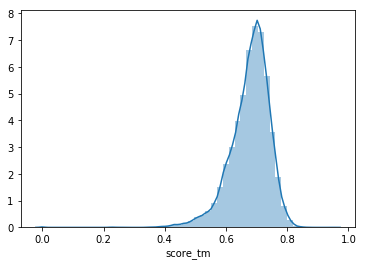

In [56]:
import seaborn as sns
sns.distplot(df_evaluadores_recomendados["score_tm"])

Numero de proyecto asignados a evaluador

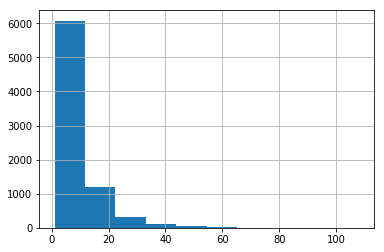

In [57]:
df_evaluadores_recomendados["CVU"].value_counts().hist()

distribucion del score

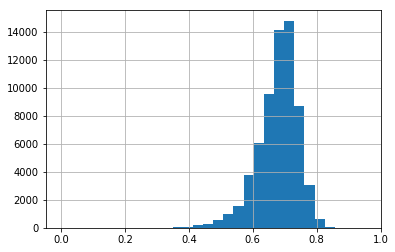

In [58]:
df_evaluadores_recomendados["score_tm"].hist(bins=30)

___

### Comparación de textos de cada evaluador entre nueva asignacion de valuacion y proyectos ya evalaudos

In [25]:
df_conv_2019 = pd.read_csv("../../data/solicitudes_2019/raw/solicitudes_201912031041.csv")

In [26]:
df_conv_2019.head(2)

,convocatoria,clave,proyecto_id,id_area,area,id_campo,campo,id_disciplina,disciplina,id_subdisciplina,...,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17
0,Ciencia de Frontera 2019,CF-MG-20191107191915010-4647203,4647203,1,Ciencias físico matemáticas y ciencias de la t...,4,Física,24,Fisica estadística,604,...,stress test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ciencia de Frontera 2019,CF-MG-20191105031440822-2574574,2574574,3,Medicina y ciencias de la salud,121,Investigación médica,837,"Enfermedades infecciosas, bacteriología clínic...",4856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Exploracion de proyectos a evaluar 

In [27]:
lista_proyectos = df_evaluadores_recomendados["id_proyecto"].unique().tolist()

In [71]:
id_proy = lista_proyectos[0]
id_proy = 194159

- CVUS de los participantes del proyecto

In [72]:
print("ra: {} \n rl: {}".format(
    df_conv_2019[df_conv_2019["proyecto_id"]==id_proy]["ra_cvu"].tolist()[0],
    df_conv_2019[df_conv_2019["proyecto_id"]==id_proy]["rl_cvu"].tolist()[0]))

ra: 383676 
 rl: 70


- Título

In [73]:
df_conv_2019[df_conv_2019["proyecto_id"]==id_proy]["titulo_es"].tolist()

['Microsensado térmico sin contacto en muestras termosensibles mediante microscopía de hoja de luz láser']

- Texto

In [74]:
df_conv_2019[df_conv_2019["proyecto_id"]==id_proy]["resumen_es"].tolist()[0].split("\n")

['En este proyecto se propone la medición de temperatura a escala sub-micrométrica en muestras de nanogeles de polímero termosensibles mediante una configuración de microscopía de hoja de luz láser. Los nanogeles de polímero contienen nanopartículas de oro que tienen una banda de absorción en el infrarrojo cercano para inducir el calentamiento a través de luz láser. Para medir la variación de la temperatura, se encapsularán en los nanogeles termosensible nanopartículas cuya fluorescencia es altamente dependiente de la temperatura. Para inducir el calentamiento y medir la temperatura, se van a adaptar dos láseres en el infrarrojo cercano a 785 y 808 nm. El láser de 785 nm se usa para calentar la muestra, mientras que el láser a 808 nm se usa para excitar las nanopartículas cuya luminiscencia es dependiente de la temperatura.']

In [91]:

len_palabras  = [len(lista_pal) for lista_pal in df_conv_2019["resumen_es"].str.split()]

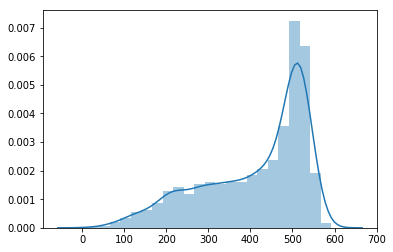

In [92]:
sns.distplot(len_palabras)

___

Datos historicos

In [75]:
df_conv_hist = load("../../data/data_entrenamento_preprocesado/datos_entrenamiento_convocatorias_filtro.pkl")

2161

Tomamos cada CVU rcomendado:

- CVU del evaluador recomendado

In [76]:
cvu_id = df_evaluadores_recomendados["CVU"][df_evaluadores_recomendados["id_proyecto"]==id_proy].reset_index(
    drop=True)[0]
print(cvu_id)

16906


In [77]:
cvu_id = 743

- Título de los proyectos ya evaluados

In [78]:
df_conv_hist[df_conv_hist["CVU"]==cvu_id]["TITULO"].tolist()

[None, None, None, None, None]

- Texto de los evaluador recomendado

In [79]:
lista_textos = df_conv_hist[df_conv_hist["CVU"]==cvu_id]["DESCRIPCION"].tolist()
for texto in lista_textos:
    print(texto[:400].lower() + '\n \n ' + texto[-400:].lower()  + '\n \n  -------- \n')

existen 3 problemas durante la formación de materiales cerámicos compuestos con cnt, que son:
	dispersión no-homogénea de los cnt en la matriz cerámica
	inadecuada densificación
	baja mojabilidad entre los cnt y la matriz cerámica
para solventar el primer paso, se propone mezclar directamente los catalizadores que son nanopartículas de algún metal con polvos micrométricos de carburos u óxidos.
 
 s precursores sólidos, funcionalizando los cnt de manera simultánea a la infiltración y crecimiento de los nitruros en la preforma cerámica.
el sistema híbrido de depósito químico de vapor (hysycvd) es una nueva ruta, eficiente, sencilla, rápida, segura y de bajo costo que permite la síntesis de materiales cerámicos compuestos con nanotubos de carbono: carburos/nitruros/cnt y óxidos/nitruros/cnt.
 
  -------- 

desde mediados de la década de los 90's se ha confirmado el papel fundamental que juega la estructura atómica local en la determinación de propiedades eléctricas, en especial el fenómen